In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


%matplotlib inline
matplotlib.rcParams['figure.figsize']= (12,8)

In [2]:
# read in data
df= pd.read_csv(r"C:\Users\pylaa\Downloads\movies.csv")
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [3]:
#missing count and percentage
for col in df.columns:
    missing_count = df[col].isnull().sum()
    pct_missing = (df[col].isnull().mean()) * 100
    dtype = df[col].dtype
    print(f'{col} |  {dtype} | Missing: {missing_count} ({pct_missing:.2f}%)')

name |  object | Missing: 0 (0.00%)
rating |  object | Missing: 77 (1.00%)
genre |  object | Missing: 0 (0.00%)
year |  int64 | Missing: 0 (0.00%)
released |  object | Missing: 2 (0.03%)
score |  float64 | Missing: 3 (0.04%)
votes |  float64 | Missing: 3 (0.04%)
director |  object | Missing: 0 (0.00%)
writer |  object | Missing: 3 (0.04%)
star |  object | Missing: 1 (0.01%)
country |  object | Missing: 3 (0.04%)
budget |  float64 | Missing: 2171 (28.31%)
gross |  float64 | Missing: 189 (2.46%)
company |  object | Missing: 17 (0.22%)
runtime |  float64 | Missing: 4 (0.05%)


In [4]:
#filling nan values with most common values(experimental purpose only)
for col in ['rating', 'released', 'score', 'votes', 'writer', 'star', 'country', 'company', 'runtime']:
    if df[col].dtype == 'O':  # object type
        df[col].fillna(df[col].mode()[0], inplace=True)  # fill with most common value
    else:
        df[col].fillna(df[col].median(), inplace=True)   # fill numeric columns with median


df['gross'].fillna(df['gross'].median(), inplace=True)
df['budget'].fillna(df['budget'].median(), inplace=True)

In [5]:
# checking to verify if there are still NaN values
for col in df.columns:
    missing_count = df[col].isnull().sum()
    pct_missing = df[col].isnull().mean() * 100
    print(f'{col} |  {df[col].dtype} | Missing: {missing_count} ({pct_missing:.2f}%)')

name |  object | Missing: 0 (0.00%)
rating |  object | Missing: 0 (0.00%)
genre |  object | Missing: 0 (0.00%)
year |  int64 | Missing: 0 (0.00%)
released |  object | Missing: 0 (0.00%)
score |  float64 | Missing: 0 (0.00%)
votes |  float64 | Missing: 0 (0.00%)
director |  object | Missing: 0 (0.00%)
writer |  object | Missing: 0 (0.00%)
star |  object | Missing: 0 (0.00%)
country |  object | Missing: 0 (0.00%)
budget |  float64 | Missing: 0 (0.00%)
gross |  float64 | Missing: 0 (0.00%)
company |  object | Missing: 0 (0.00%)
runtime |  float64 | Missing: 0 (0.00%)


In [6]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,20500000.0,1.400000e+03,British Broadcasting Corporation (BBC),103.0
7625,The Untold Story,R,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,20500000.0,7.900000e+02,Visual Arts Entertainment,104.0
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,20500000.0,6.820000e+02,Roxwell Films,93.0
2417,Madadayo,R,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000.0,5.960000e+02,DENTSU Music And Entertainment,134.0


In [ ]:
#to view entire data
# df.set_option('display.max_rows', None)
# df

In [ ]:
pl

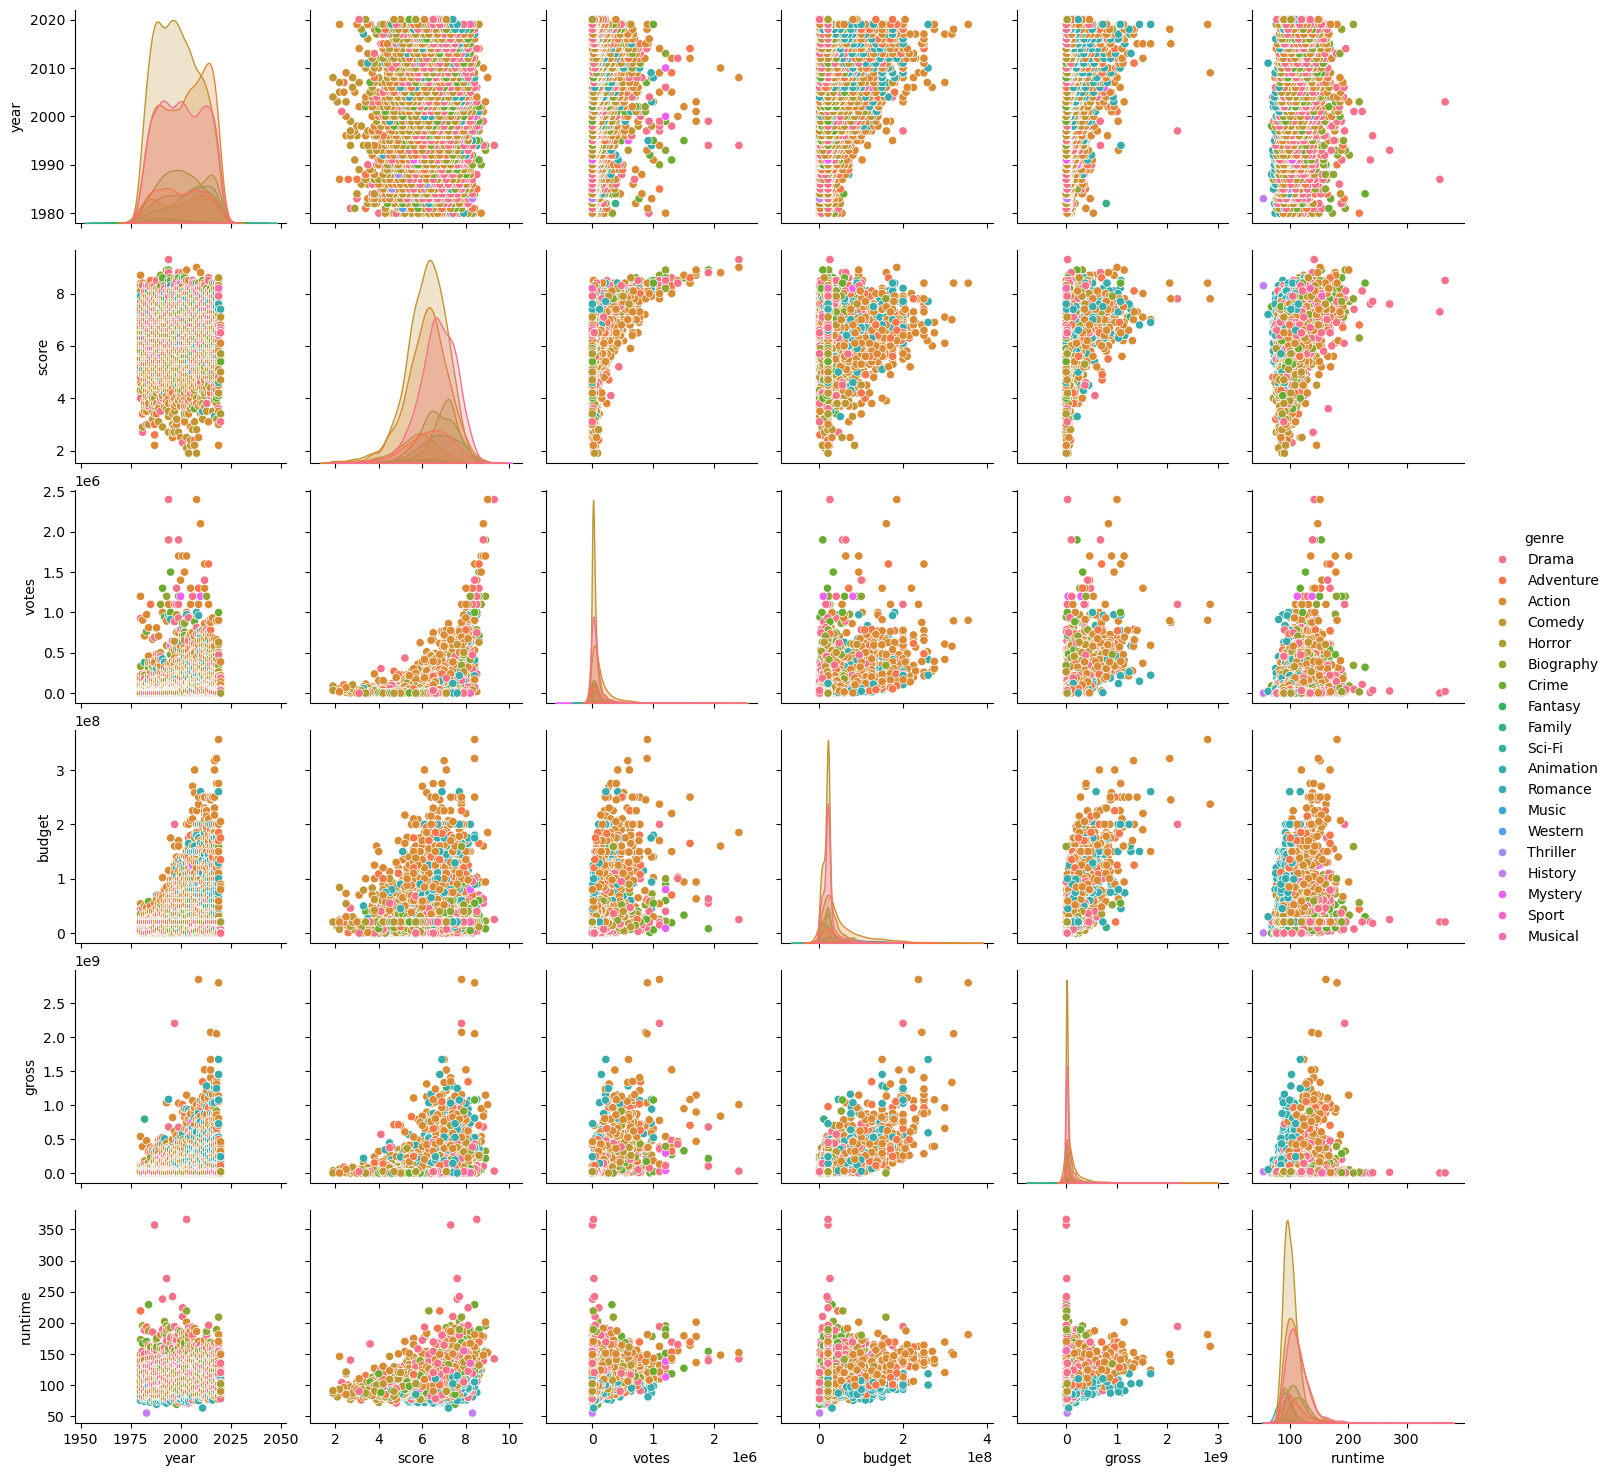

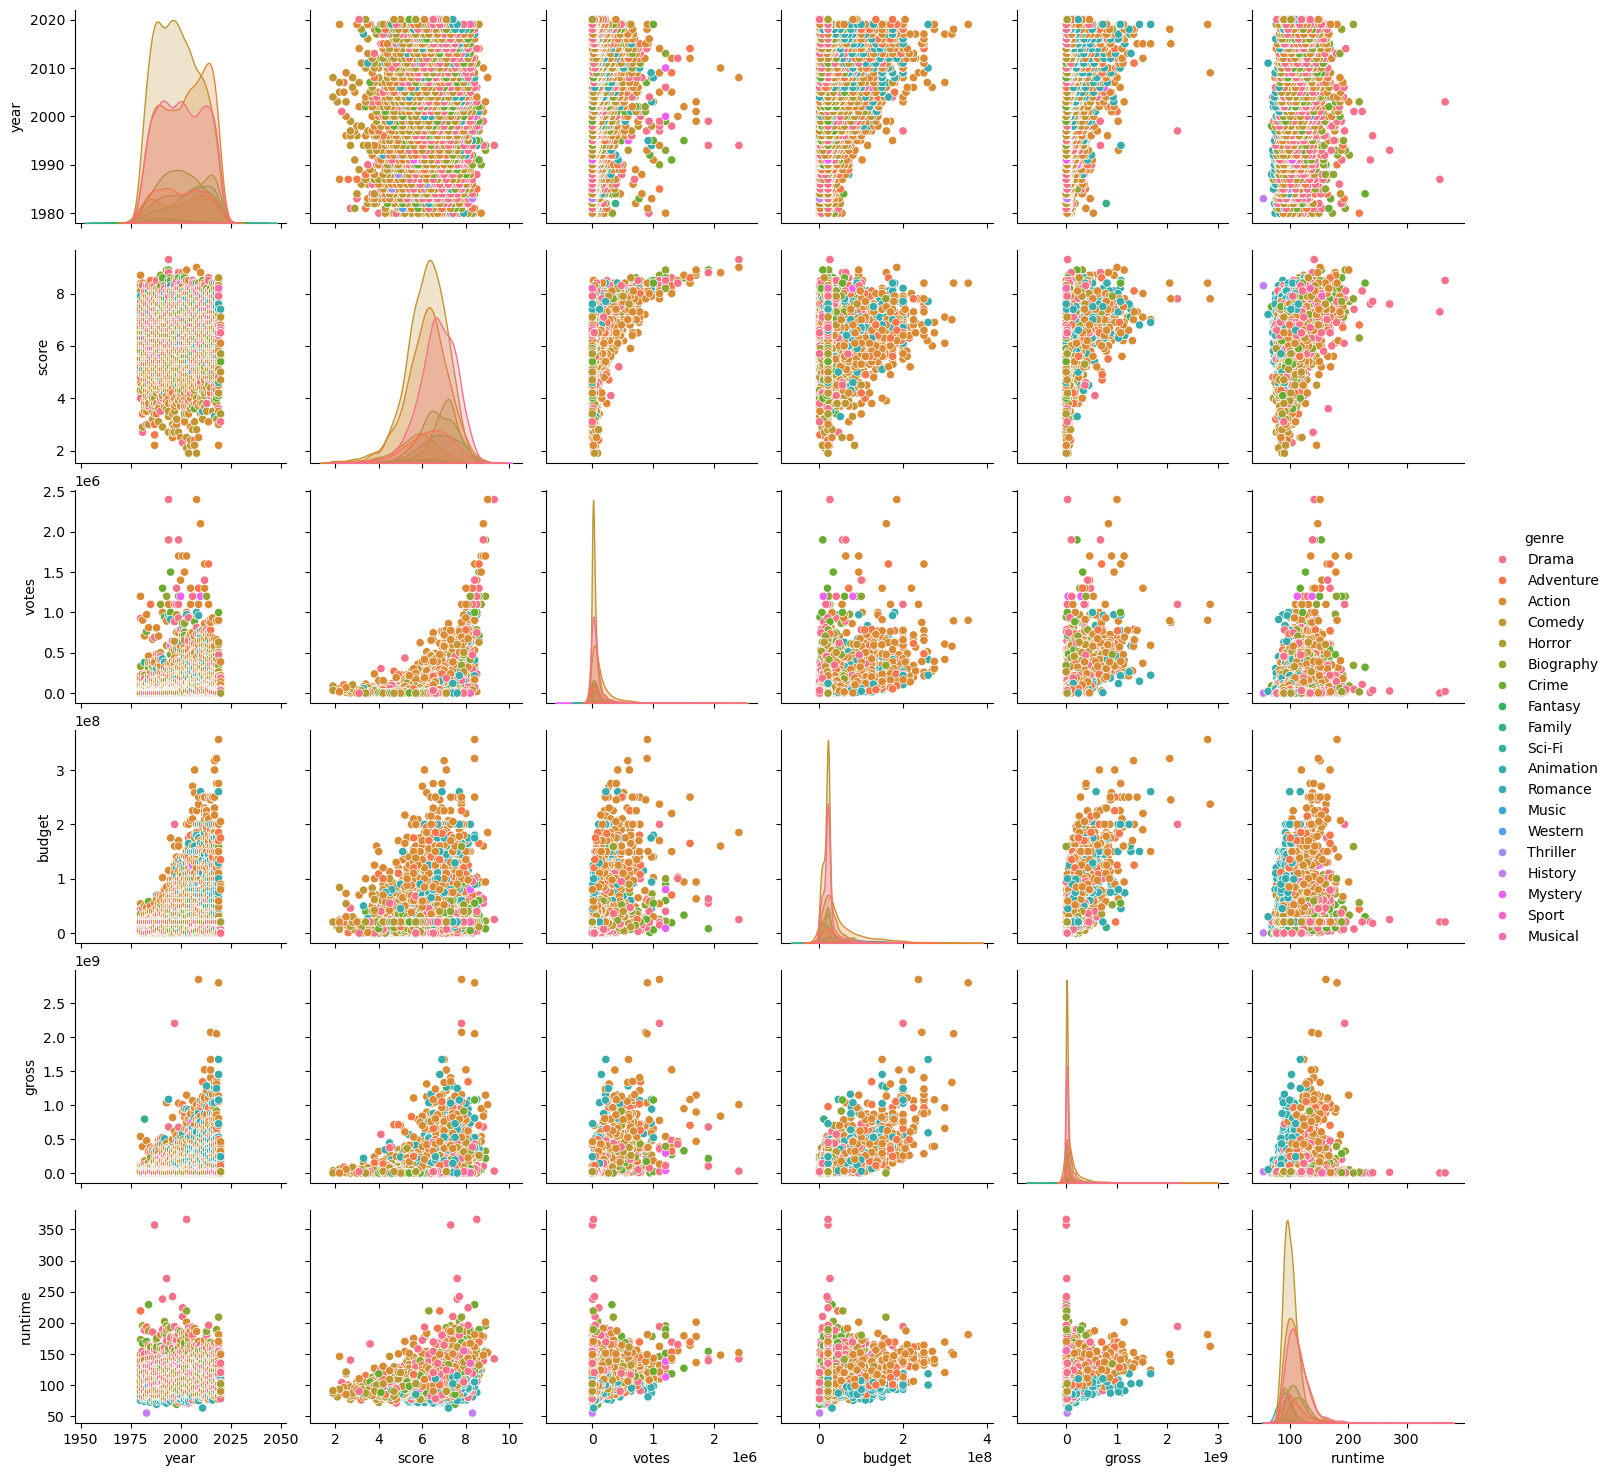

In [8]:
sns.pairplot(df, hue="genre")
plt.show()

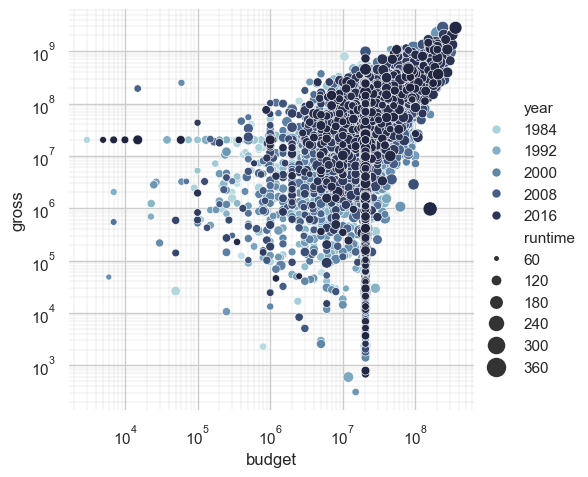

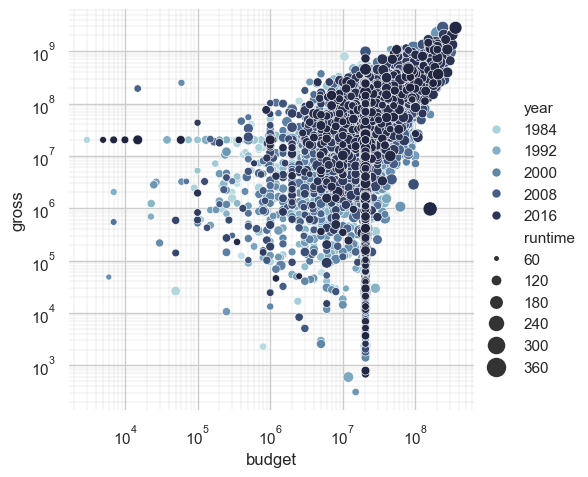

In [10]:
sns.set_theme(style="whitegrid")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df,
    x="budget", y="gross",
    hue="year", size="runtime",
    palette=cmap, sizes=(10, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)
plt.show()

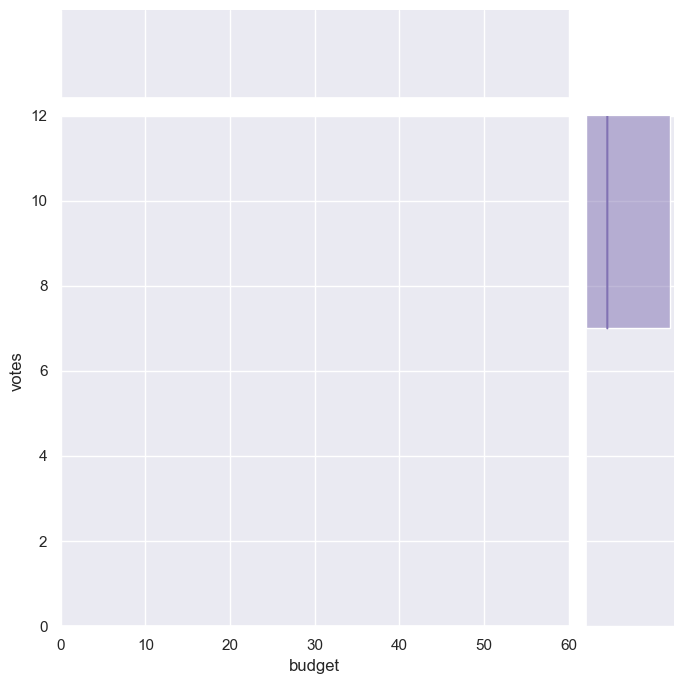

In [12]:
sns.set_theme(style="darkgrid")
g = sns.jointplot(x="budget", y="votes", data=df,
                  kind="reg", truncate=False,
                                 color="m", height=7)
plt.show()